In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])

## Two layers

In [119]:
keys = [e.replace('.npy', '') for e in os.listdir('plot_files_512d-512d_10us')]
data = {}
for key in keys:
    data[key] = np.load(f'plot_files_512d-512d_10us/{key}.npy')
print(*keys[:5], sep=' '*4)
print(*keys[5:10], sep=' '*4)
print(*keys[10:], sep=' '*4)
data['total_mpds'] = data['core_idx']
data['core_idx'] = np.array(range(57))

print('synops', data['syn_ops'].sum())
print('total time', data['execution_time_per_step'].sum()/1e6)

total_power = data['total_power']
static_total_power = data['static_total_power']
vdd_p = data['vdd_power']
vddm_p = data['vddm_power']
vddio_p = data['vddio_power']
total_power_mean = np.mean(total_power)
vdd_p_mean = np.mean(vdd_p)
vddm_p_mean = np.mean(vddm_p)
vddio_p_mean = np.mean(vddio_p)
print(f'Total Power   : {total_power_mean:.6f} W')
print(f'Dynamic Power : {total_power_mean - static_total_power:.6f} W')
print(f'Static Power  : {static_total_power:.6f} W')
print(f'VDD Power     : {vdd_p_mean:.6f} W')
print(f'VDD-M Power   : {vddm_p_mean:.6f} W')
print(f'VDD-IO Power  : {vddio_p_mean:.6f} W')

dendrite_updates    core_idx    spiking_time_per_step    static_vddm_power    static_vddio_power
vdd_power    static_vdd_power    vddm_power    execution_time_per_step    management_time_per_step
static_total_power    total_power    vddio_power    output    syn_ops    spikes_in    axon_out
synops 6072829
total time 39.97196399999997
Total Power   : 0.551813 W
Dynamic Power : -0.000788 W
Static Power  : 0.552601 W
VDD Power     : 0.196667 W
VDD-M Power   : 0.293475 W
VDD-IO Power  : 0.061671 W


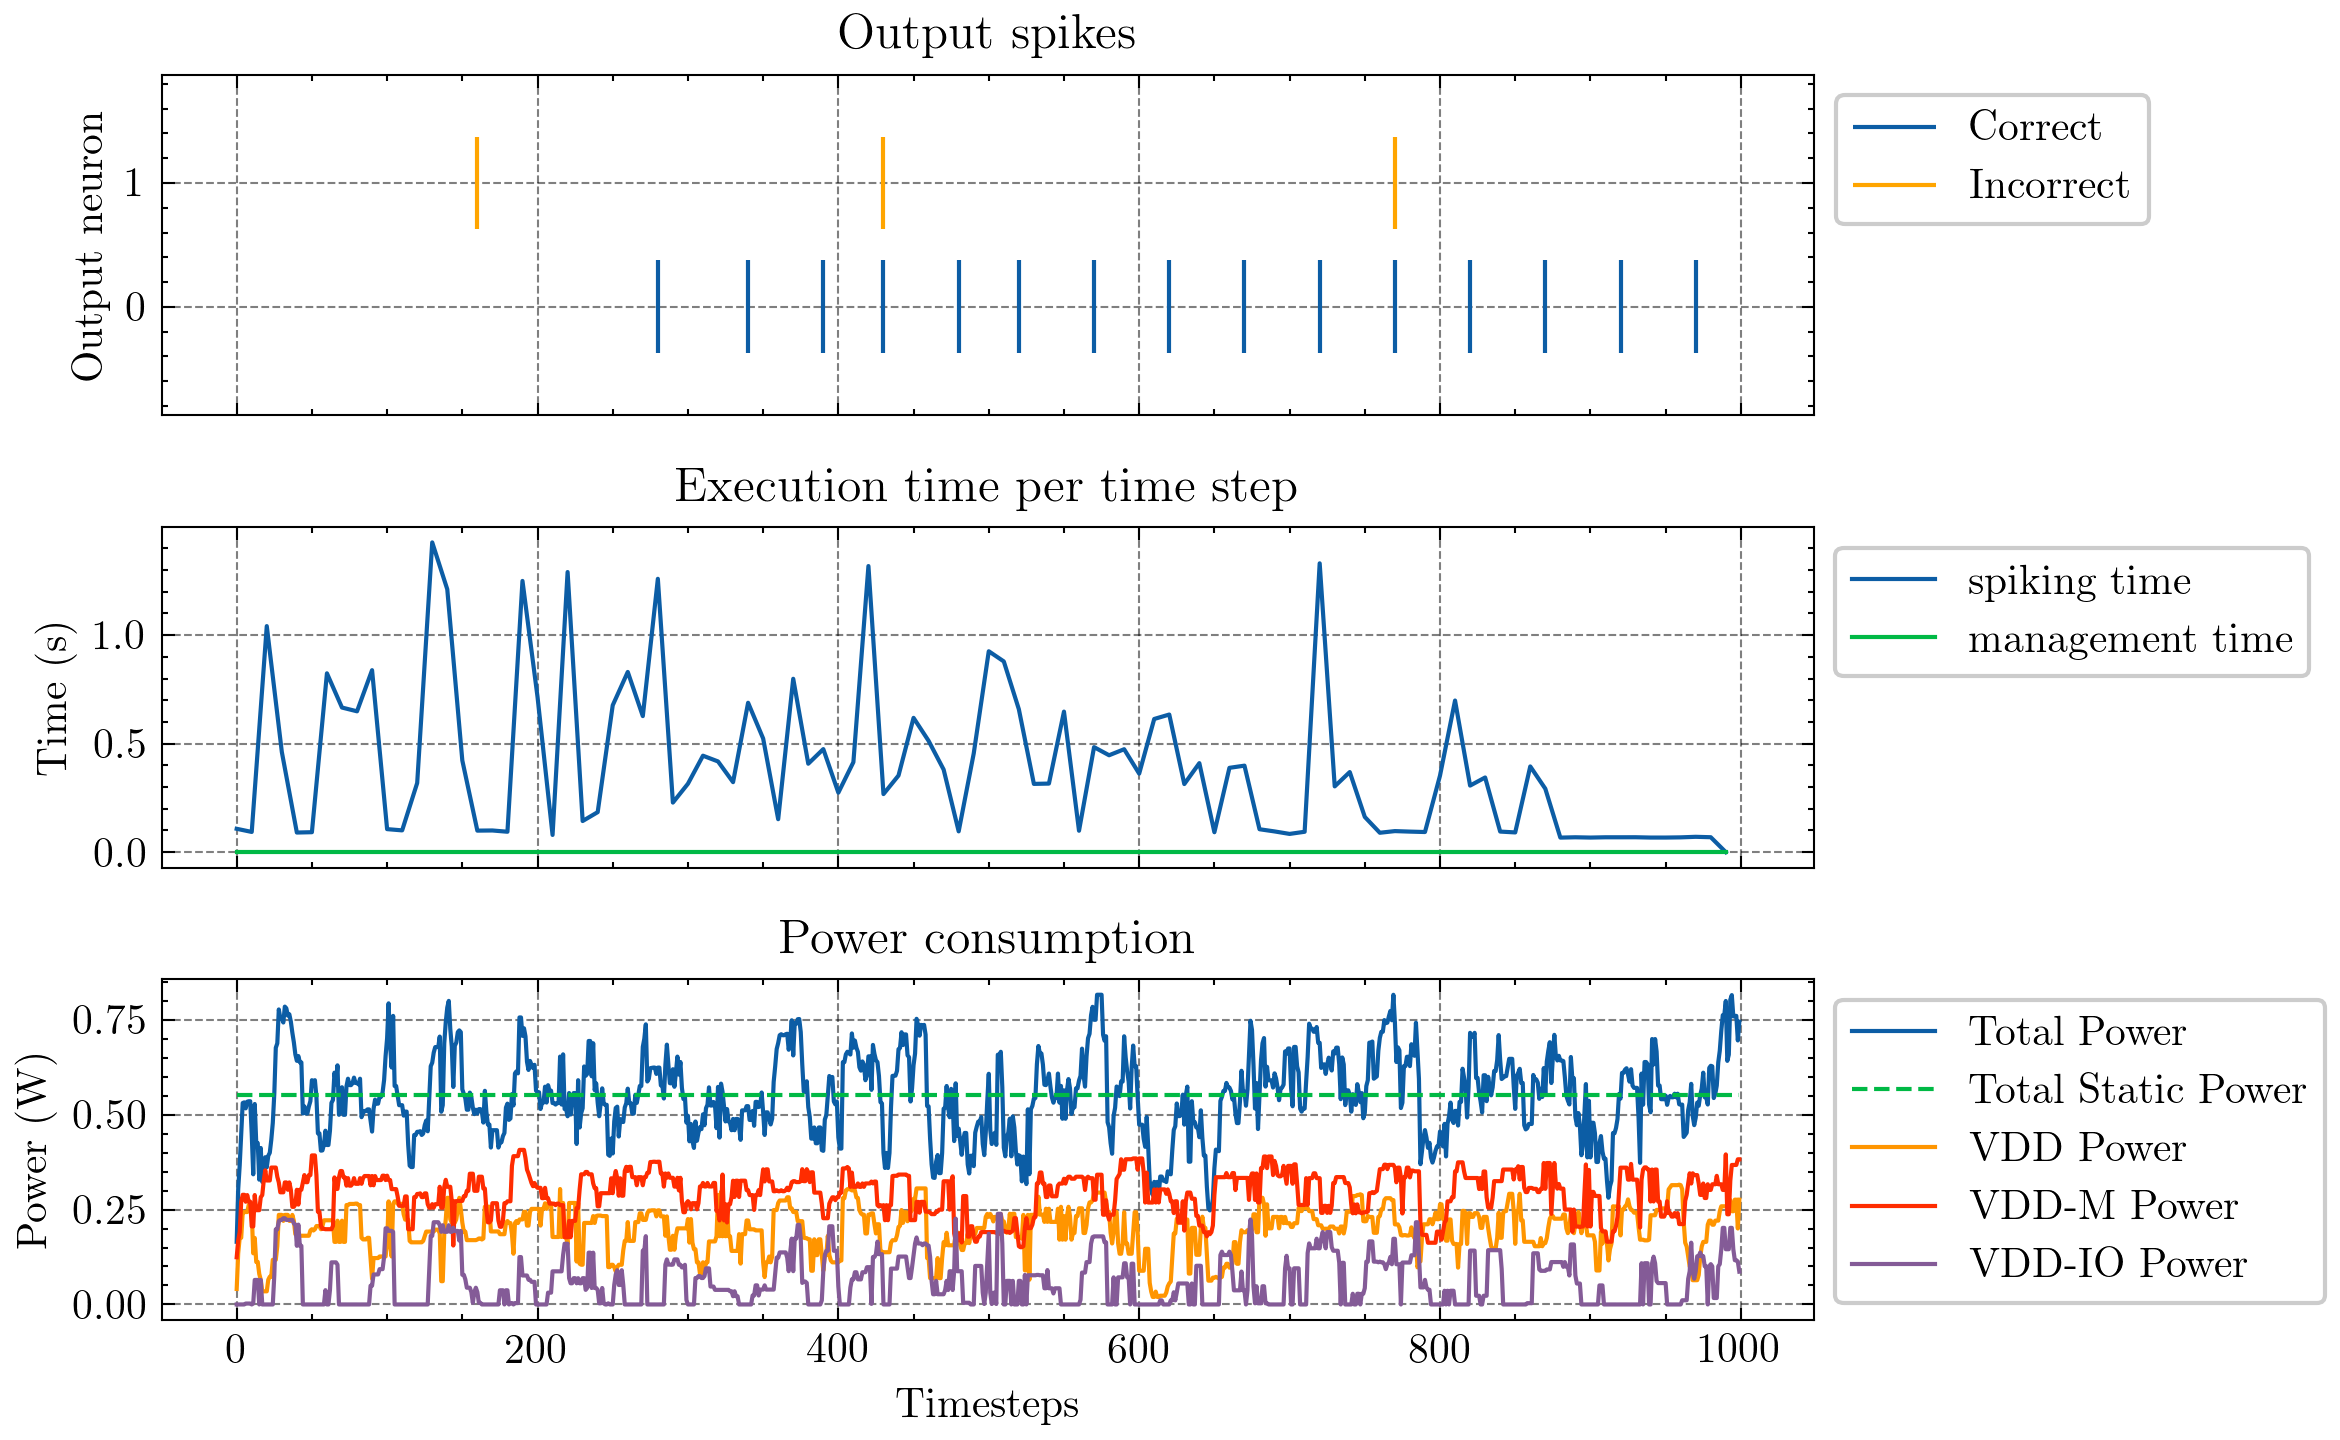

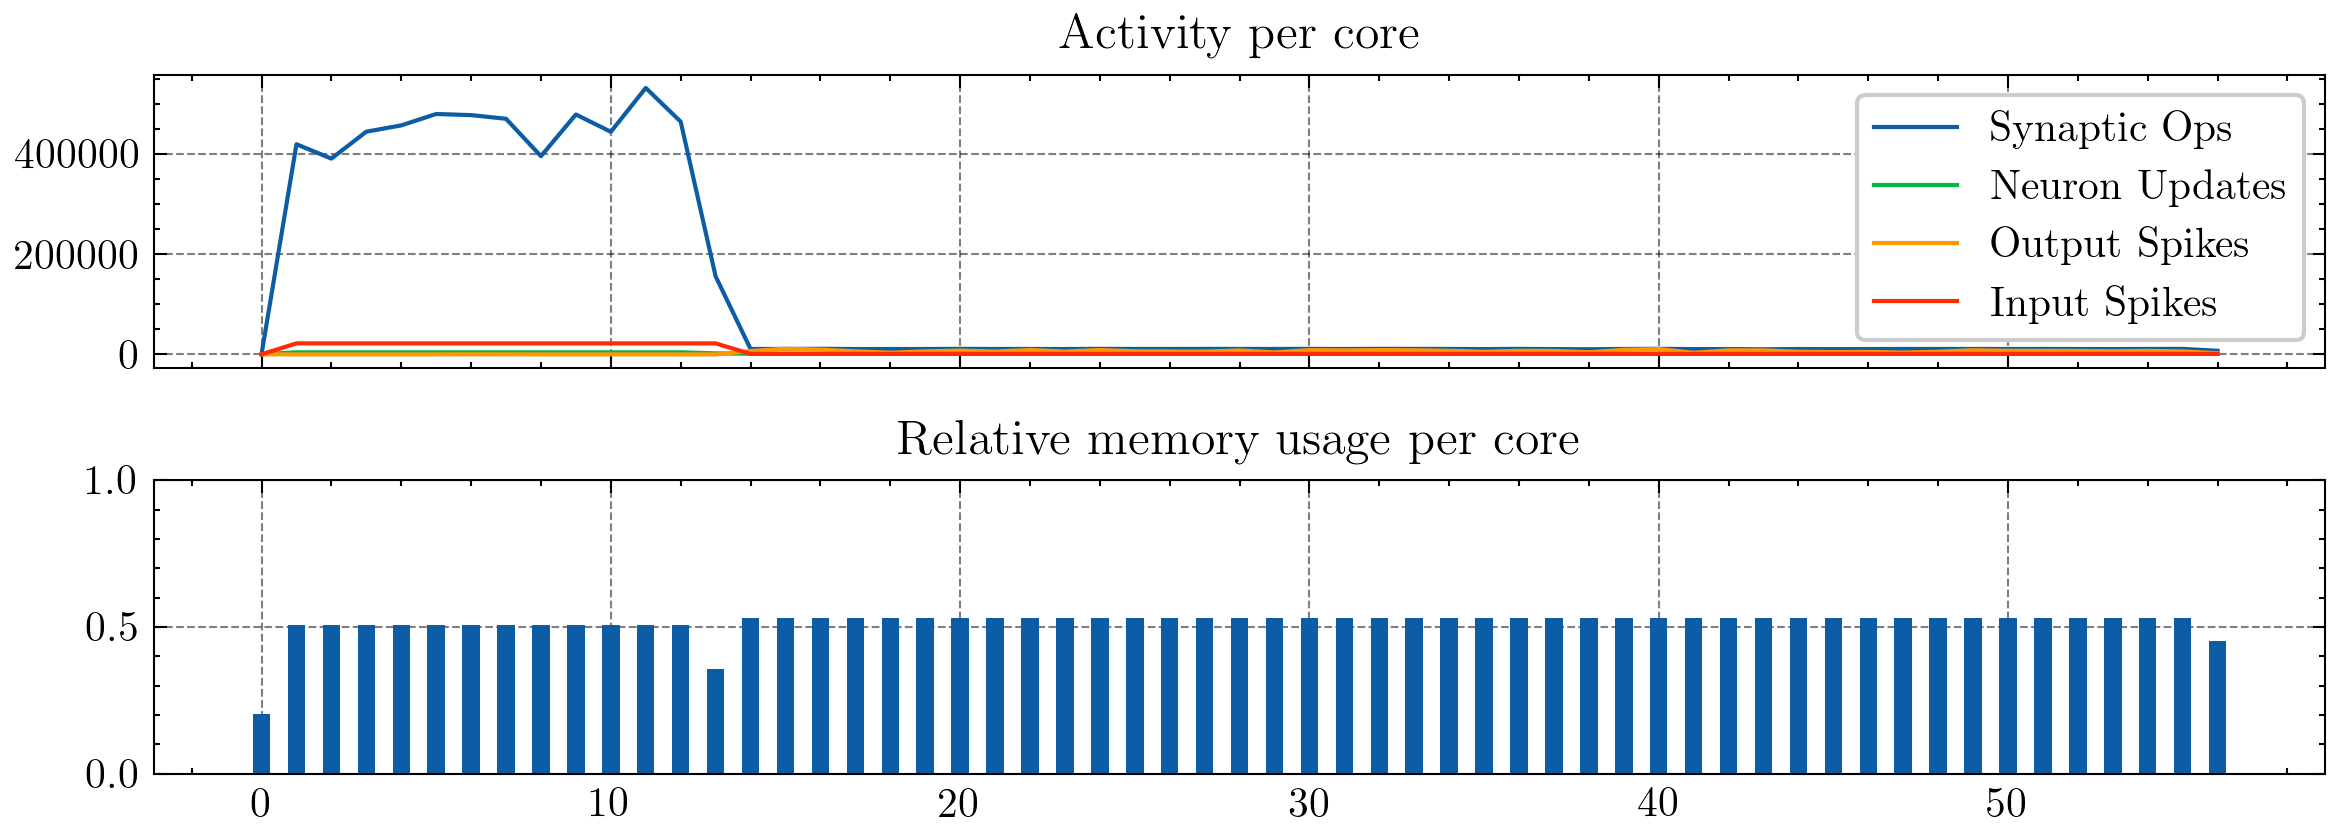

In [108]:
plt.close()
fig, axs = plt.subplots(nrows=3, figsize=(8, 5), sharex=True, dpi=300)

ax = axs[0]
output = data['output']
params = {'linelengths': 0.75, 'linewidths': 1}
ax.set_title('Output spikes')
ax.eventplot(np.where(output[0] == 1.0)[0] * 10, label='Correct', lineoffsets=0, **params)
ax.eventplot(np.where(output[1] == 1.0)[0] * 10, label='Incorrect', **params, color='orange')
ax.legend(bbox_to_anchor=(1.215, 1.0))
ax.set_ylabel('Output neuron')

ax = axs[1]
ax.set_title('Execution time per time step')
X = np.arange(0, 1000, 1e3/data['execution_time_per_step'].shape[0])
# ax.plot(X, data['execution_time_per_step'] / 1e6, label='total execution time')
ax.plot(X, data['spiking_time_per_step'] / 1e6, label='spiking time')
ax.plot(X, data['management_time_per_step'] / 1e6, label='management time')
ax.set_ylabel('Time (s)')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[2]
total_power = data['total_power']
static_total_power = data['static_total_power']
vdd_p = data['vdd_power']
vddm_p = data['vddm_power']
vddio_p = data['vddio_power']
ax.set_title('Power consumption')
ax.plot(total_power, label='Total Power')
ax.plot(np.zeros_like(total_power) + static_total_power, ls='--', label='Total Static Power')
ax.plot(vdd_p, label='VDD Power')
ax.plot(vddm_p, label='VDD-M Power')
ax.plot(vddio_p, label='VDD-IO Power')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Timesteps')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()
plt.close()

#################################################

fig, axs = plt.subplots(nrows=2, figsize=(8, 3), sharex=True, dpi=300)

ax = axs[0]
ax.set_title('Activity per core')
ax.plot(data['core_idx'], data['syn_ops'], label='Synaptic Ops')
ax.plot(data['core_idx'], data['dendrite_updates'], label='Neuron Updates')
ax.plot(data['core_idx'], data['axon_out'], label='Output Spikes')
ax.plot(data['core_idx'], data['spikes_in'], label='Input Spikes')
# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[1]
ax.set_title('Relative memory usage per core')
ax.bar(data['core_idx'], data['total_mpds'], label='Memory Utilization', width=0.5)
ax.set_ylim(0, 1)

plt.tight_layout()

## One layer

In [120]:
keys = [e.replace('.npy', '') for e in os.listdir('plot_files_512d_10us')]
data = {}
for key in keys:
    data[key] = np.load(f'plot_files_512d_10us/{key}.npy')
print(*keys[:5], sep=' '*4)
print(*keys[5:10], sep=' '*4)
print(*keys[10:], sep=' '*4)
data['total_mpds'] = data['core_idx']
data['core_idx'] = np.array(range(44))

print('synops', data['syn_ops'].sum())
print('total time', data['execution_time_per_step'].sum()/1e6)

total_power = data['total_power']
static_total_power = data['static_total_power']
vdd_p = data['vdd_power']
vddm_p = data['vddm_power']
vddio_p = data['vddio_power']
total_power_mean = np.mean(total_power)
vdd_p_mean = np.mean(vdd_p)
vddm_p_mean = np.mean(vddm_p)
vddio_p_mean = np.mean(vddio_p)
print(f'Total Power   : {total_power_mean:.6f} W')
print(f'Dynamic Power : {total_power_mean - static_total_power:.6f} W')
print(f'Static Power  : {static_total_power:.6f} W')
print(f'VDD Power     : {vdd_p_mean:.6f} W')
print(f'VDD-M Power   : {vddm_p_mean:.6f} W')
print(f'VDD-IO Power  : {vddio_p_mean:.6f} W')

dendrite_updates    core_idx    spiking_time_per_step    static_vddm_power    static_vddio_power
vdd_power    static_vdd_power    vddm_power    execution_time_per_step    management_time_per_step
static_total_power    total_power    vddio_power    output    syn_ops    spikes_in    axon_out
synops 392200
total time 10.097926
Total Power   : 0.562348 W
Dynamic Power : 0.009238 W
Static Power  : 0.553110 W
VDD Power     : 0.193644 W
VDD-M Power   : 0.300964 W
VDD-IO Power  : 0.067739 W


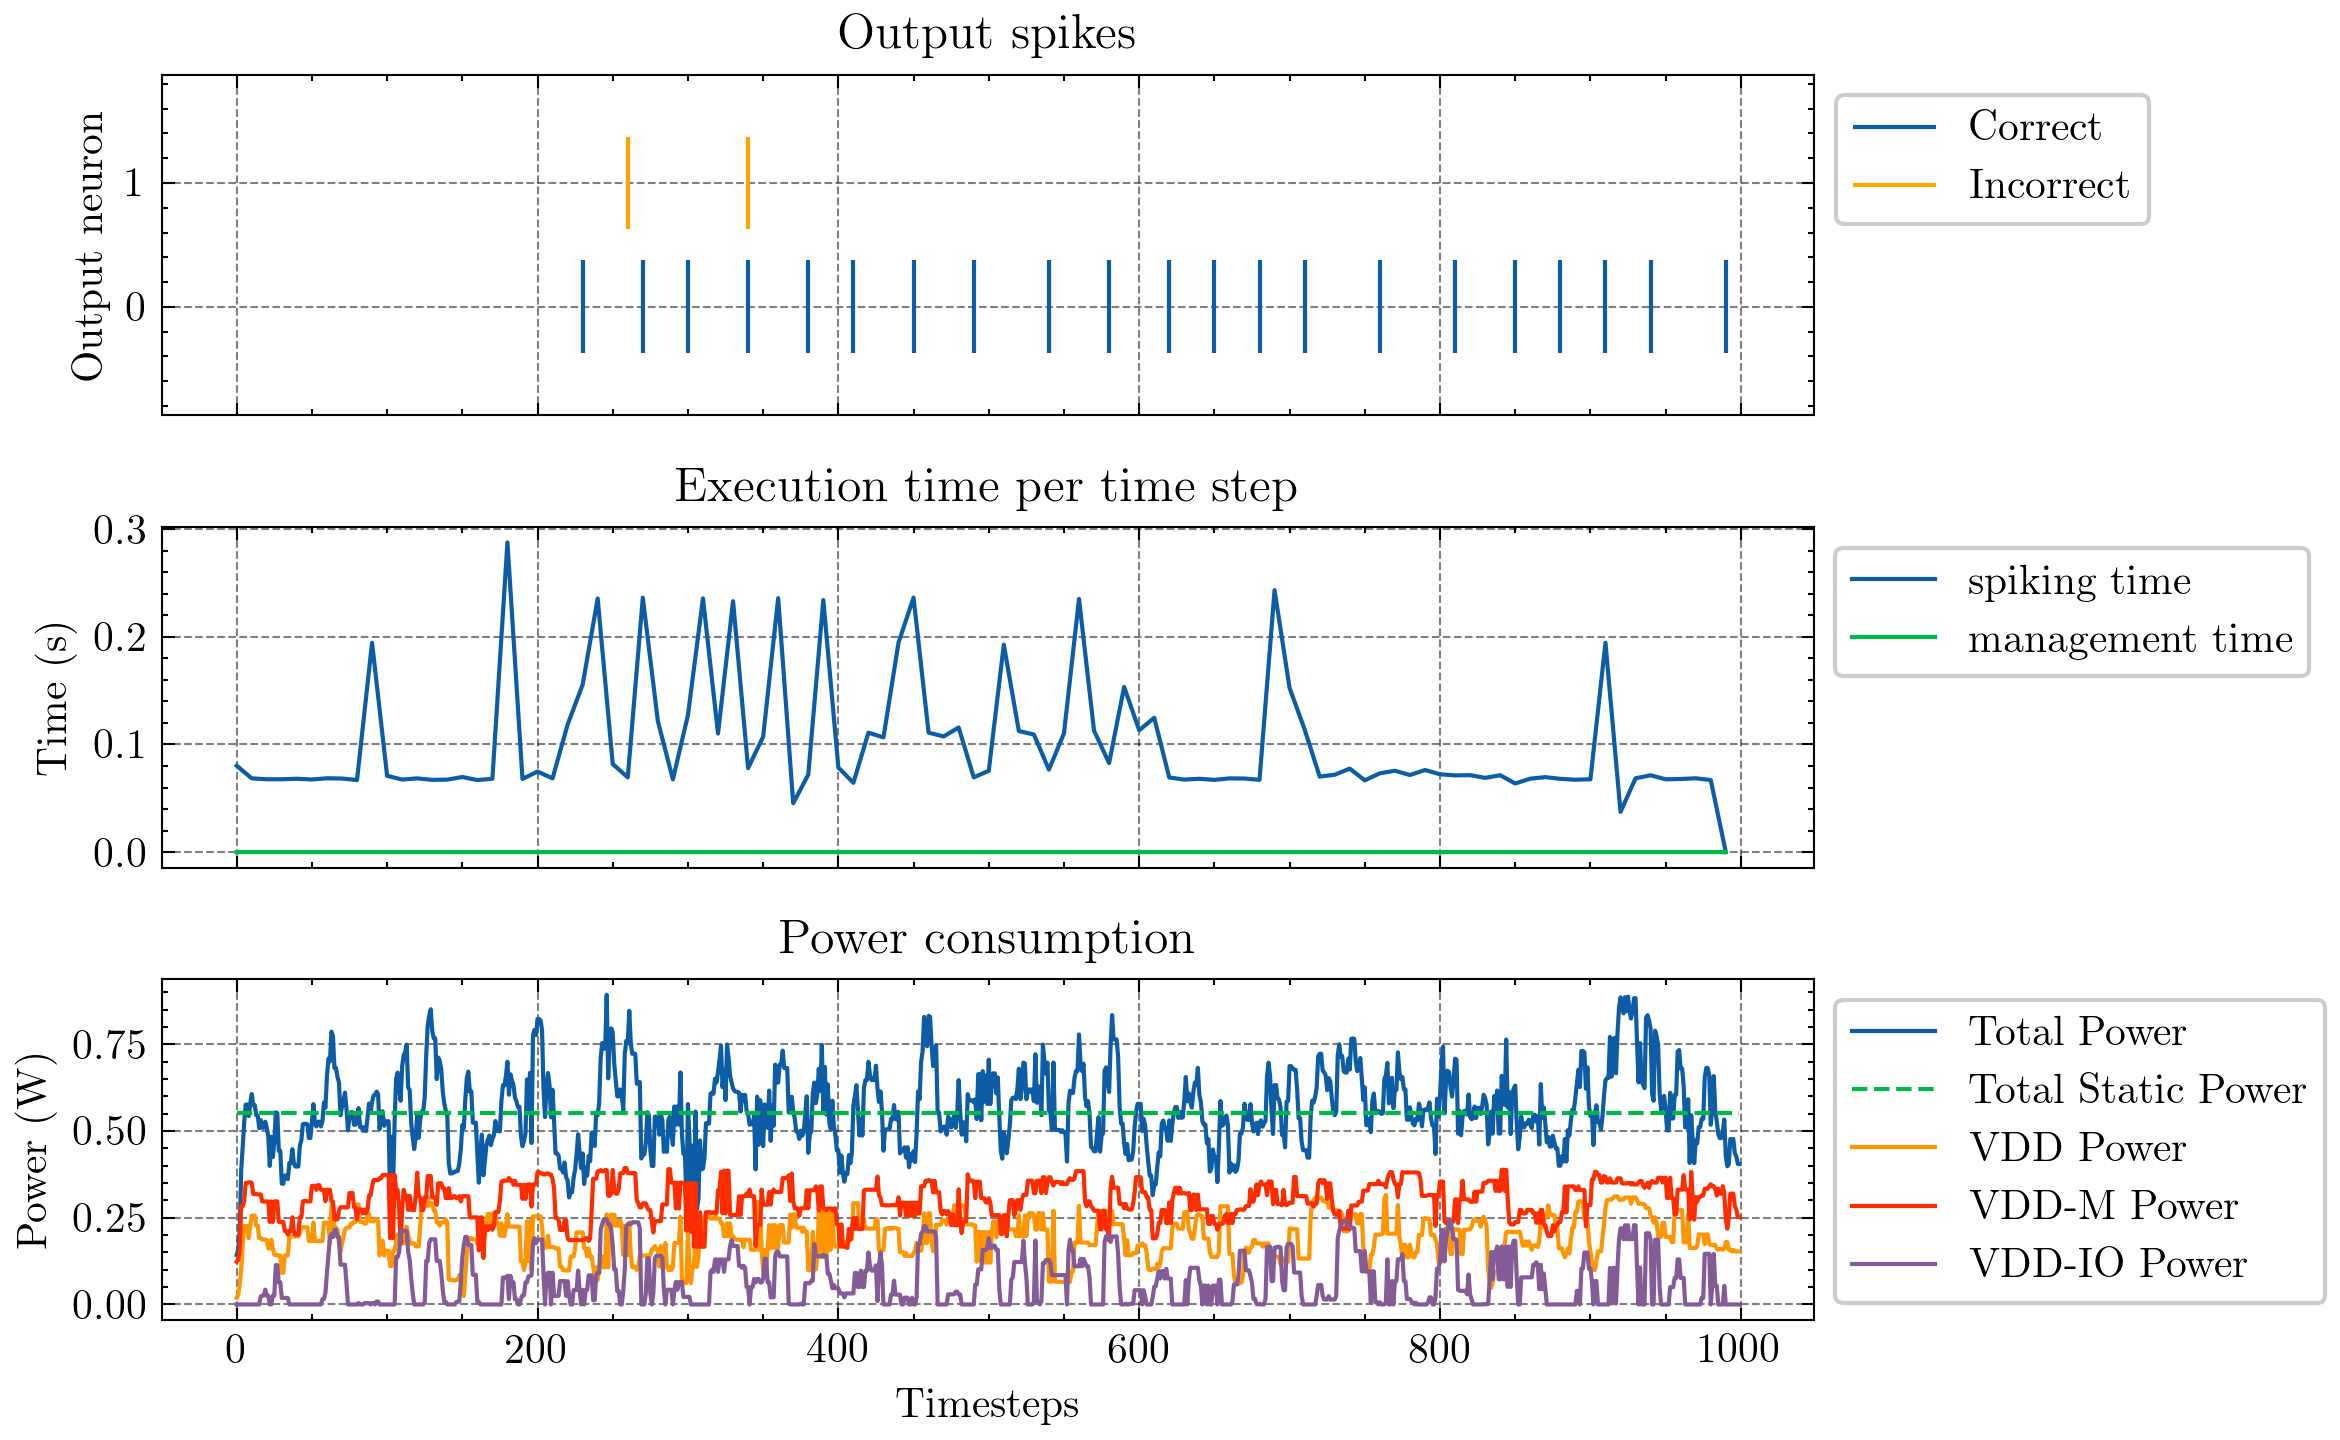

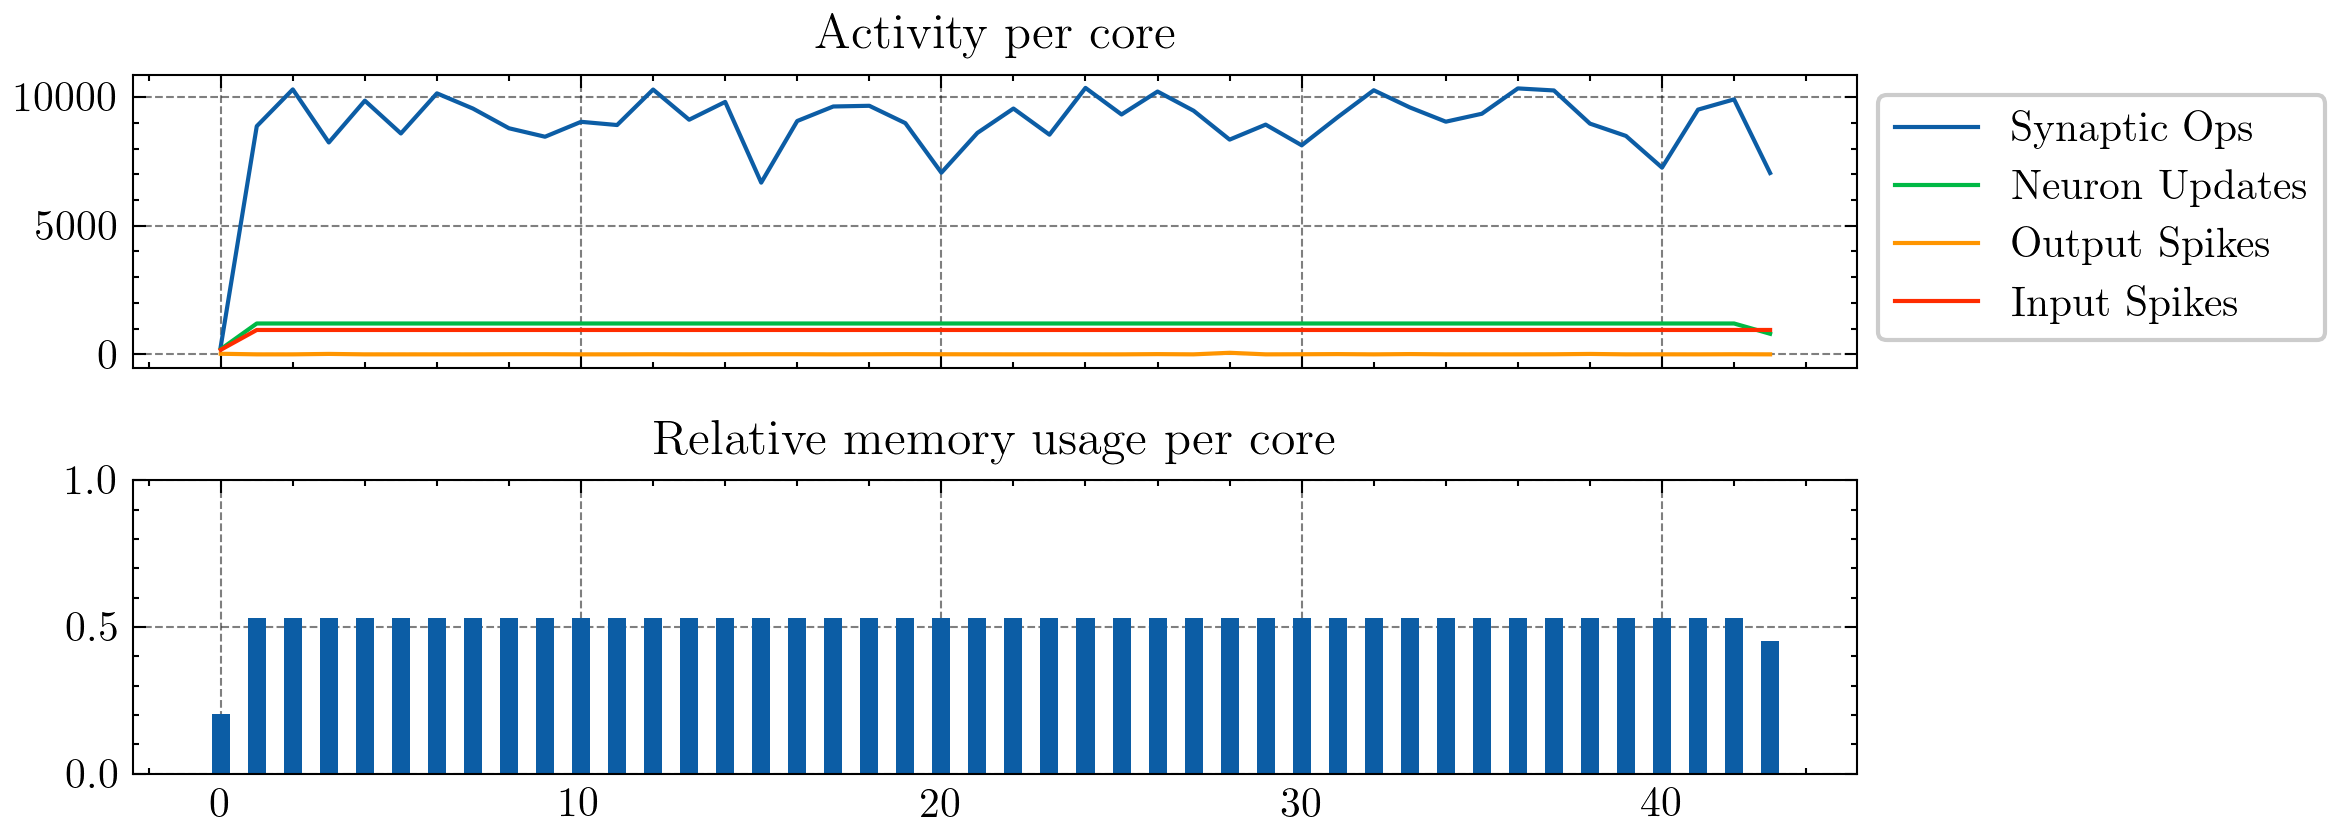

In [110]:
plt.close()
fig, axs = plt.subplots(nrows=3, figsize=(8, 5), sharex=True, dpi=300)

ax = axs[0]
output = data['output']
params = {'linelengths': 0.75, 'linewidths': 1}
ax.set_title('Output spikes')
ax.eventplot(np.where(output[0] == 1.0)[0] * 10, label='Correct', lineoffsets=0, **params)
ax.eventplot(np.where(output[1] == 1.0)[0] * 10, label='Incorrect', **params, color='orange')
ax.legend(bbox_to_anchor=(1.215, 1.0))
ax.set_ylabel('Output neuron')

ax = axs[1]
ax.set_title('Execution time per time step')
X = np.arange(0, 1000, 1e3/data['execution_time_per_step'].shape[0])
# ax.plot(X, data['execution_time_per_step'] / 1e6, label='total execution time')
ax.plot(X, data['spiking_time_per_step'] / 1e6, label='spiking time')
ax.plot(X, data['management_time_per_step'] / 1e6, label='management time')
ax.set_ylabel('Time (s)')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[2]
ax.set_title('Power consumption')
ax.plot(total_power, label='Total Power')
ax.plot(np.zeros_like(total_power) + static_total_power, ls='--', label='Total Static Power')
ax.plot(vdd_p, label='VDD Power')
ax.plot(vddm_p, label='VDD-M Power')
ax.plot(vddio_p, label='VDD-IO Power')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Timesteps')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()
plt.close()

#################################################

fig, axs = plt.subplots(nrows=2, figsize=(8, 3), sharex=True, dpi=300)

ax = axs[0]
ax.set_title('Activity per core')
ax.plot(data['core_idx'], data['syn_ops'], label='Synaptic Ops')
ax.plot(data['core_idx'], data['dendrite_updates'], label='Neuron Updates')
ax.plot(data['core_idx'], data['axon_out'], label='Output Spikes')
ax.plot(data['core_idx'], data['spikes_in'], label='Input Spikes')
# ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[1]
ax.set_title('Relative memory usage per core')
ax.bar(data['core_idx'], data['total_mpds'], label='Memory Utilization', width=0.5)
ax.set_ylim(0, 1)

plt.tight_layout()

synops 6072829
total time 39.97196399999997
Total Power   : 0.551813 W
Dynamic Power : -0.000788 W
Static Power  : 0.552601 W
VDD Power     : 0.196667 W
VDD-M Power   : 0.293475 W
VDD-IO Power  : 0.061671 W

synops 392200
total time 10.097926
Total Power   : 0.562348 W
Dynamic Power : 0.009238 W
Static Power  : 0.553110 W
VDD Power     : 0.193644 W
VDD-M Power   : 0.300964 W
VDD-IO Power  : 0.067739 W


## Joint

In [122]:
keys = [e.replace('.npy', '') for e in os.listdir('plot_files_512d_10us')]
data = {}
for key in keys:
    data[key] = np.load(f'plot_files_512d_10us/{key}.npy')
data['total_mpds'] = data['core_idx']
data['core_idx'] = np.array(range(44))

data1l = data.copy()
print('1 LAYER NETWORK:')
print('synops', data1l['syn_ops'].sum())
print('total time', data1l['execution_time_per_step'].sum()/1e6)
total_power_mean = np.mean(data1l['total_power'])
vdd_p_mean = np.mean(data1l['vdd_power'])
vddm_p_mean = np.mean(data1l['vddm_power'])
vddio_p_mean = np.mean(data1l['vddio_power'])
print(f'Total Power   : {total_power_mean:.6f} W')
print(f'Dynamic Power : {total_power_mean - data1l["static_total_power"]:.6f} W')
print(f'Static Power  : {data1l["static_total_power"]:.6f} W')
print(f'VDD Power     : {vdd_p_mean:.6f} W')
print(f'VDD-M Power   : {vddm_p_mean:.6f} W')
print(f'VDD-IO Power  : {vddio_p_mean:.6f} W')
print()

keys = [e.replace('.npy', '') for e in os.listdir('plot_files_512d-512d_10us')]
data = {}
for key in keys:
    data[key] = np.load(f'plot_files_512d-512d_10us/{key}.npy')
data['total_mpds'] = data['core_idx']
data['core_idx'] = np.array(range(57))

data2l = data.copy()
print('2 LAYER NETWORK:')
print('synops', data2l['syn_ops'].sum())
print('total time', data2l['execution_time_per_step'].sum()/1e6)
total_power_mean = np.mean(data2l['total_power'])
vdd_p_mean = np.mean(data2l['vdd_power'])
vddm_p_mean = np.mean(data2l['vddm_power'])
vddio_p_mean = np.mean(data2l['vddio_power'])
print(f'Total Power   : {total_power_mean:.6f} W')
print(f'Dynamic Power : {total_power_mean - data2l["static_total_power"]:.6f} W')
print(f'Static Power  : {data2l["static_total_power"]:.6f} W')
print(f'VDD Power     : {vdd_p_mean:.6f} W')
print(f'VDD-M Power   : {vddm_p_mean:.6f} W')
print(f'VDD-IO Power  : {vddio_p_mean:.6f} W')
print()

1 LAYER NETWORK:
synops 392200
total time 10.097926
Total Power   : 0.562348 W
Dynamic Power : 0.009238 W
Static Power  : 0.553110 W
VDD Power     : 0.193644 W
VDD-M Power   : 0.300964 W
VDD-IO Power  : 0.067739 W

2 LAYER NETWORK:
synops 6072829
total time 39.97196399999997
Total Power   : 0.551813 W
Dynamic Power : -0.000788 W
Static Power  : 0.552601 W
VDD Power     : 0.196667 W
VDD-M Power   : 0.293475 W
VDD-IO Power  : 0.061671 W



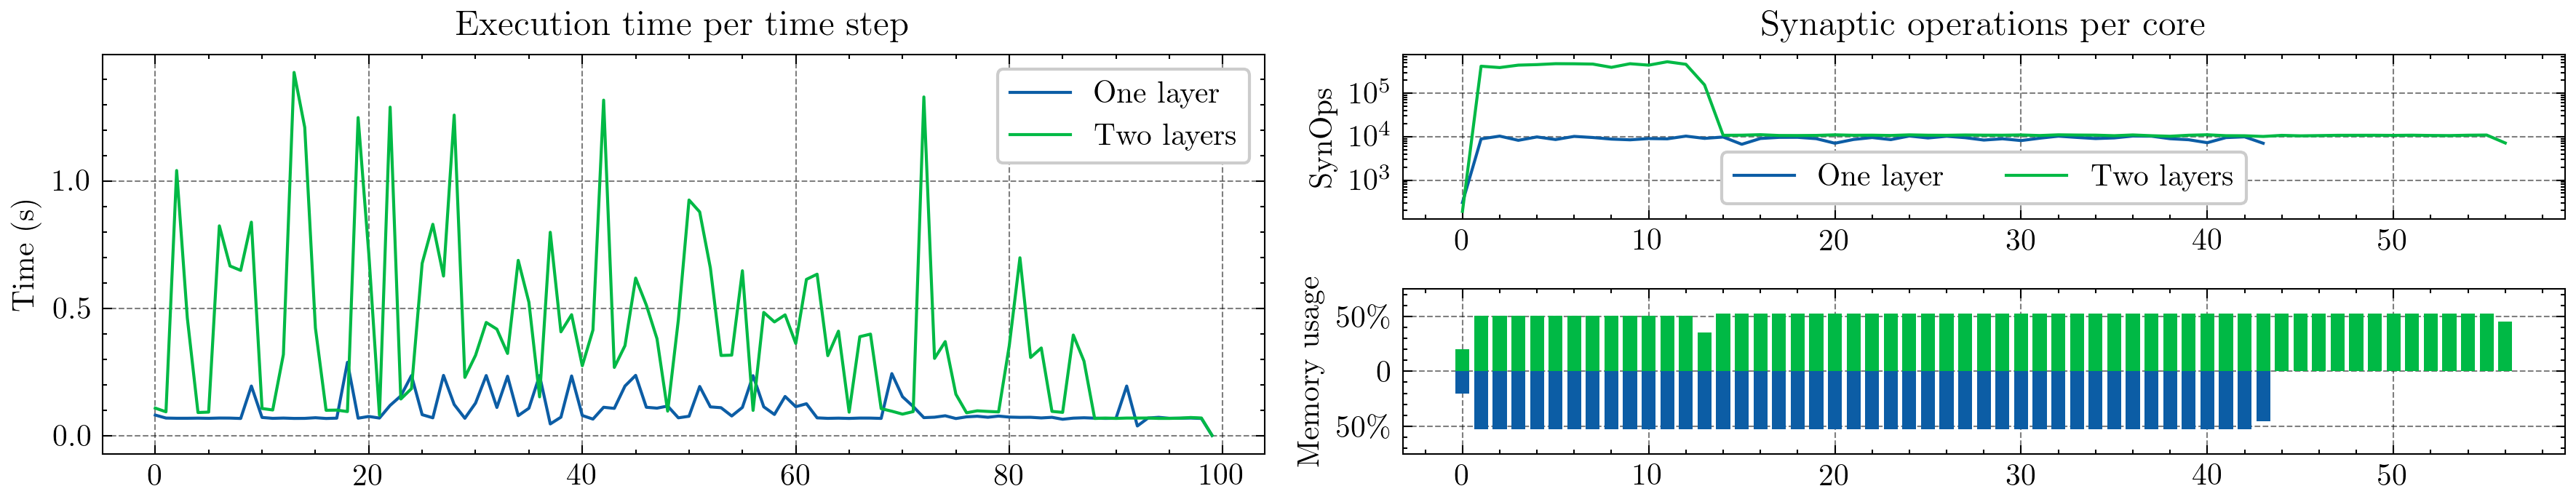

In [173]:
plt.close()
fig = plt.figure(figsize=(12, 2.5), dpi=300)
gs = fig.add_gridspec(2, 2)

ax_time = fig.add_subplot(gs[:, 0])
ax_act = fig.add_subplot(gs[0, 1])
ax_mem = fig.add_subplot(gs[1, 1], sharex=ax_act)

data = data1l.copy()
ax_time.plot(data['execution_time_per_step'] / 1e6, label='One layer')
ax_act.plot(data['core_idx'], data['syn_ops'], label='One layer')
ax_mem.bar(data['core_idx'], -1*data['total_mpds'], label='One layer', width=0.75)

data = data2l.copy()
ax_time.plot(data['execution_time_per_step'] / 1e6, label='Two layers')
ax_act.plot(data['core_idx'], data['syn_ops'], label='Two layers')
ax_mem.bar(data['core_idx'], data['total_mpds'], label='Two layers', width=0.75)

ax_time.set_title('Execution time per time step')
ax_time.set_ylabel('Time (s)')
ax_time.legend(loc='upper right')
ax_act.legend(loc='lower center', ncol=2)
ax_act.set_yscale('log')
ax_mem.set_ylim(-0.75, 0.75)
ax_mem.set_yticks([-0.5, 0, 0.5], ['50\%', 0, '50\%'])

ax_act.set_title('Synaptic operations per core')
# ax_mem.set_title('Relative memory usage per core')
ax_act.set_ylabel('SynOps')
ax_mem.set_ylabel('Memory usage')

plt.tight_layout()
plt.savefig('loihi_metrics.pdf')

### Hi

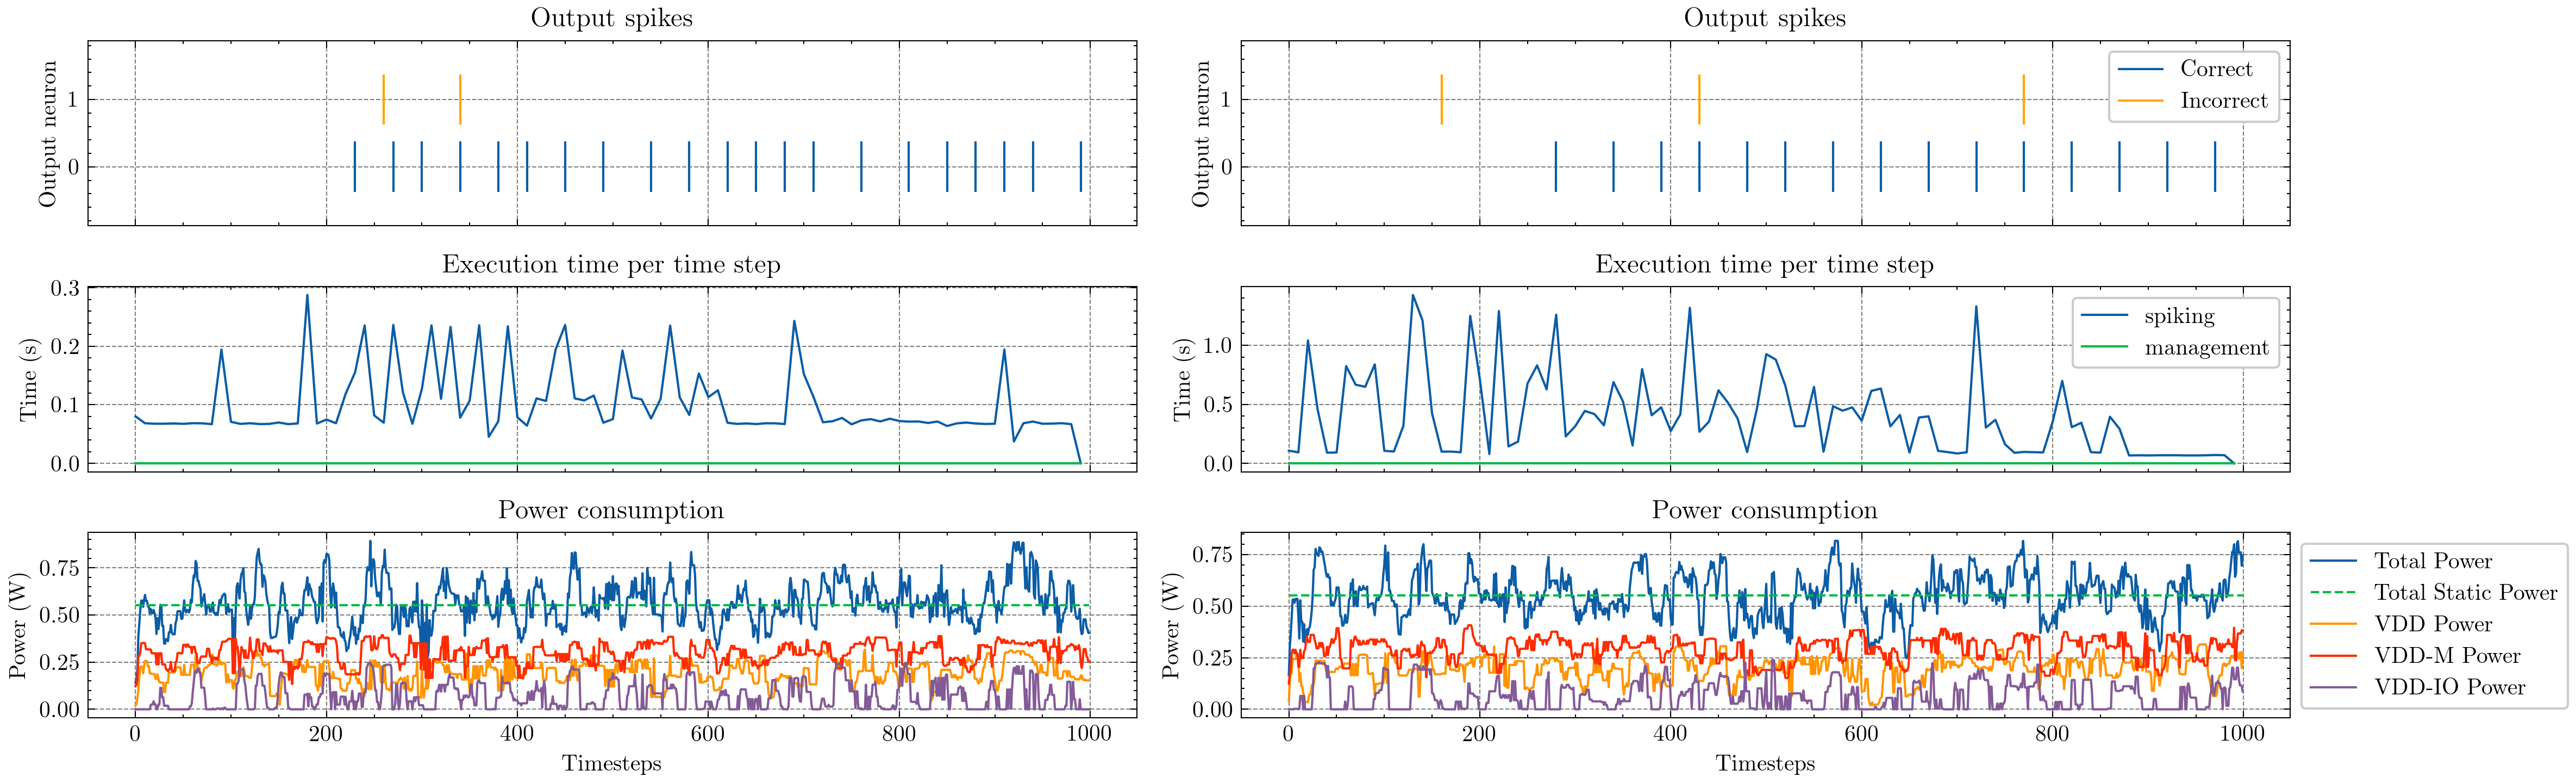

In [126]:
plt.close()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 5), sharex=True, dpi=300)

data = data1l.copy()

ax = axs[0][0]
output = data['output']
params = {'linelengths': 0.75, 'linewidths': 1}
ax.set_title('Output spikes')
ax.eventplot(np.where(output[0] == 1.0)[0] * 10, label='Correct', lineoffsets=0, **params)
ax.eventplot(np.where(output[1] == 1.0)[0] * 10, label='Incorrect', **params, color='orange')
# ax.legend(bbox_to_anchor=(1.215, 1.0))
ax.set_ylabel('Output neuron')

ax = axs[1][0]
ax.set_title('Execution time per time step')
X = np.arange(0, 1000, 1e3/data['execution_time_per_step'].shape[0])
# ax.plot(X, data['execution_time_per_step'] / 1e6, label='total execution time')
ax.plot(X, data['spiking_time_per_step'] / 1e6, label='spiking time')
ax.plot(X, data['management_time_per_step'] / 1e6, label='management time')
ax.set_ylabel('Time (s)')
# ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[2][0]
total_power = data['total_power']
static_total_power = data['static_total_power']
vdd_p = data['vdd_power']
vddm_p = data['vddm_power']
vddio_p = data['vddio_power']
ax.set_title('Power consumption')
ax.plot(total_power, label='Total Power')
ax.plot(np.zeros_like(total_power) + static_total_power, ls='--', label='Total Static Power')
ax.plot(vdd_p, label='VDD Power')
ax.plot(vddm_p, label='VDD-M Power')
ax.plot(vddio_p, label='VDD-IO Power')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Timesteps')
# ax.legend(bbox_to_anchor=(1.0, 1.0))

data = data2l.copy()

ax = axs[0][1]
output = data['output']
params = {'linelengths': 0.75, 'linewidths': 1}
ax.set_title('Output spikes')
ax.eventplot(np.where(output[0] == 1.0)[0] * 10, label='Correct', lineoffsets=0, **params)
ax.eventplot(np.where(output[1] == 1.0)[0] * 10, label='Incorrect', **params, color='orange')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylabel('Output neuron')

ax = axs[1][1]
ax.set_title('Execution time per time step')
X = np.arange(0, 1000, 1e3/data['execution_time_per_step'].shape[0])
# ax.plot(X, data['execution_time_per_step'] / 1e6, label='total execution time')
ax.plot(X, data['spiking_time_per_step'] / 1e6, label='spiking')
ax.plot(X, data['management_time_per_step'] / 1e6, label='management')
ax.set_ylabel('Time (s)')
ax.legend(bbox_to_anchor=(1.0, 1.0))

ax = axs[2][1]
total_power = data['total_power']
static_total_power = data['static_total_power']
vdd_p = data['vdd_power']
vddm_p = data['vddm_power']
vddio_p = data['vddio_power']
ax.set_title('Power consumption')
ax.plot(total_power, label='Total Power')
ax.plot(np.zeros_like(total_power) + static_total_power, ls='--', label='Total Static Power')
ax.plot(vdd_p, label='VDD Power')
ax.plot(vddm_p, label='VDD-M Power')
ax.plot(vddio_p, label='VDD-IO Power')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Timesteps')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()